In [1]:
#pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix  

In [4]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
 ds = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MLProjects/bank.csv")

In [6]:
ds.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
ds.shape

(10000, 14)

In [8]:
ds.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)


In [9]:
ds.shape

(10000, 11)

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
ds['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
ds['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
ds['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

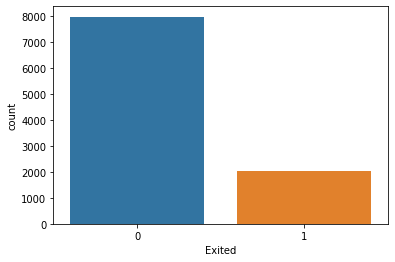

In [14]:
sns.countplot(x=ds['Exited'])

In [15]:
X=ds.iloc[:,0:10]
Y=ds.iloc[:,10]

In [16]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [17]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:

label_X_gender_encoder = LabelEncoder()
X.iloc[:,2] = label_X_gender_encoder.fit_transform(X.iloc[:,2])
print(X.iloc[:6,2])

0    0
1    0
2    0
3    0
4    0
5    1
Name: Gender, dtype: int64


In [19]:
label_x_country=LabelEncoder()
X.iloc[:,1]=label_x_country.fit_transform(X.iloc[:,1])
print(X.iloc[:10,1])


0    0
1    2
2    0
3    0
4    2
5    2
6    0
7    1
8    0
9    0
Name: Geography, dtype: int64


In [20]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [21]:
countryhotencoder = ColumnTransformer([("countries", OneHotEncoder(), [1])], remainder="passthrough")
X = countryhotencoder.fit_transform(X)

In [22]:
X.shape

(10000, 12)

In [23]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [24]:
X = X[:,1:]

Divide the data into Train and Test

In [25]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.3,random_state=7)

In [26]:
Xtrain

array([[0.0000000e+00, 0.0000000e+00, 6.3000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 4.8984950e+04],
       [1.0000000e+00, 0.0000000e+00, 8.5000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.4007555e+05],
       [1.0000000e+00, 0.0000000e+00, 6.4700000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 5.4954510e+04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 6.8400000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 8.7219410e+04],
       [0.0000000e+00, 1.0000000e+00, 6.8600000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.2756980e+05],
       [0.0000000e+00, 0.0000000e+00, 7.2500000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.3372057e+05]])

In [27]:
Ytrain

2317    0
259     0
584     1
475     1
9156    1
       ..
919     0
4307    0
5699    0
537     0
9412    0
Name: Exited, Length: 7000, dtype: int64

Normalize Train and test datas

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.fit_transform(Xtest)

In [29]:
Xtrain

array([[-0.57691038, -0.5780101 , -0.21266528, ...,  0.64798017,
         0.96159408, -0.88562379],
       [ 1.73337147, -0.5780101 ,  2.07282937, ...,  0.64798017,
         0.96159408,  0.69032632],
       [ 1.73337147, -0.5780101 , -0.03605887, ..., -1.54325711,
        -1.03993984, -0.78234498],
       ...,
       [-0.57691038, -0.5780101 ,  0.34831977, ...,  0.64798017,
         0.96159408, -0.2241329 ],
       [-0.57691038,  1.73007358,  0.369097  , ...,  0.64798017,
        -1.03993984,  0.47396549],
       [-0.57691038, -0.5780101 ,  0.77425287, ..., -1.54325711,
        -1.03993984,  0.58037939]])

Initialize and build the models

In [68]:
classifier=Sequential()


In [69]:
classifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

In [70]:
classifier.add(Dense(6, activation='sigmoid', kernel_initializer='uniform'))

In [71]:
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform')) 

In [72]:
# Create optimizer with default learning rate
# Compile the model
classifier.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [73]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 72        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [74]:
Xtrain.shape

(7000, 11)

In [75]:
classifier.fit(Xtrain, Ytrain,           
          validation_data=(Xtest,Ytest),
          epochs=10,
          batch_size=700)

Epoch 1/10
10/10 [==============================] - 0s 18ms/step - loss: 0.2432 - accuracy: 0.7954 - val_loss: 0.2403 - val_accuracy: 0.7983
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2383 - accuracy: 0.7954 - val_loss: 0.2356 - val_accuracy: 0.7983
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2337 - accuracy: 0.7954 - val_loss: 0.2311 - val_accuracy: 0.7983
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2295 - accuracy: 0.7954 - val_loss: 0.2270 - val_accuracy: 0.7983
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.7954 - val_loss: 0.2231 - val_accuracy: 0.7983
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2217 - accuracy: 0.7954 - val_loss: 0.2194 - val_accuracy: 0.7983
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.7954 - val_loss: 0.2160 - val_accuracy: 0.7983
Epoch 8/10
10/10 [=

Predict the results using .5 as threshold

In [76]:
ypred = classifier.predict(Xtest)
print(ypred)

[[0.4163402 ]
 [0.41645846]
 [0.4162719 ]
 ...
 [0.41634995]
 [0.41632354]
 [0.41635925]]


In [77]:
ypred = (ypred > 0.5)
print(ypred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


Print the Accuracy score and confusion matrix

In [81]:
cm = confusion_matrix(Ytest, ypred)
print(cm)

[[2395    0]
 [ 605    0]]


In [82]:
accuracy = ((cm1[0][0]+cm1[1][1])*100)/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
print (accuracy, '% of testing data')

79.83333333333333 % of testing data


Loss:
loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. 

In [89]:
# Initializing the ANN
classifier1 = Sequential()

classifier1.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

In [90]:

classifier1.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 

In [91]:
classifier1.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) 

In [92]:
classifier1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [93]:
classifier1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6)                 72        
                                                                 
 dense_17 (Dense)            (None, 6)                 42        
                                                                 
 dense_18 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [94]:
classifier1.fit(Xtrain, Ytrain,           
          validation_data=(Xtest,Ytest),
          epochs=100,
          batch_size=32)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.5990 - accuracy: 0.7939 - val_loss: 0.4574 - val_accuracy: 0.7983
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7954 - val_loss: 0.4295 - val_accuracy: 0.7983
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7954 - val_loss: 0.4251 - val_accuracy: 0.7983
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7954 - val_loss: 0.4223 - val_accuracy: 0.7983
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.7954 - val_loss: 0.4196 - val_accuracy: 0.7983
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8234 - val_loss: 0.4161 - val_accuracy: 0.8260
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8290 - val_loss: 0.4131 - val_accuracy: 0.8277

In [95]:
ypred = classifier1.predict(Xtest)
print(ypred)

[[0.07794532]
 [0.09524342]
 [0.07998303]
 ...
 [0.01860482]
 [0.07210109]
 [0.08519328]]


In [96]:
ypred = (ypred > 0.5)
print(ypred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [97]:
cm2 = confusion_matrix(Ytest, ypred)
print(cm2)

[[2288  107]
 [ 390  215]]


In [98]:
accuracy_model1 = ((cm2[0][0]+cm2[1][1])*100)/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])
print (accuracy_model1, '% of testing data')

83.43333333333334 % of testing data
